# Micro-Market Opportunity Mapping for SELCO India - West Bengal

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load data
data = {
    "District": [
        "Purba Medinipur", "Kolkata", "North 24 Parganas", "Howrah", "Hooghly",
        "Darjeeling", "Paschim Medinipur", "South 24 Parganas", "Bardhaman", "Nadia",
        "Cooch Behar", "Dakshin Dinajpur", "Jalpaiguri", "Bankura", "Birbhum",
        "Murshidabad", "Purulia", "Maldah", "Uttar Dinajpur"
    ],
    "Electrification (%)": [95, 98, 96, 97, 95, 85, 88, 89, 96, 94, 87, 86, 85, 75, 76, 70, 68, 66, 65],
    "Literacy Rate (%)": [87.02, 86.31, 84.06, 83.85, 82.55, 79.92, 79.04, 78.57, 77.15, 75.58,
                          75.49, 73.86, 73.79, 70.95, 70.90, 67.53, 65.38, 62.71, 60.13],
    "Solar Potential (kWh/m2/day)": [4.5, 4.2, 4.4, 4.2, 4.3, 4.8, 4.6, 4.5, 4.4, 4.3,
                                     4.7, 4.6, 4.7, 5.0, 5.0, 5.1, 5.2, 5.3, 5.1],
    "Poverty Level (%)": [15, 12, 14, 13, 14, 25, 22, 21, 13, 15, 23, 24, 22, 35, 34, 37, 38, 40, 41]
}

df = pd.DataFrame(data)
df["Need_Electrification"] = 100 - df["Electrification (%)"]
df["Need_Poverty"] = df["Poverty Level (%)"]

scaler = MinMaxScaler()
features_to_normalize = ["Need_Electrification", "Literacy Rate (%)", "Solar Potential (kWh/m2/day)", "Need_Poverty"]
normalized = scaler.fit_transform(df[features_to_normalize])
normalized_df = pd.DataFrame(normalized, columns=[f"Normalized_{col}" for col in features_to_normalize])
df = pd.concat([df, normalized_df], axis=1)

# Compute weighted Opportunity Score
weights = {
    "Normalized_Need_Electrification": 0.3,
    "Normalized_Literacy Rate (%)": 0.2,
    "Normalized_Solar Potential (kWh/m2/day)": 0.3,
    "Normalized_Need_Poverty": 0.2
}
df["Opportunity Score"] = (
    weights["Normalized_Need_Electrification"] * df["Normalized_Need_Electrification"] +
    weights["Normalized_Literacy Rate (%)"] * df["Normalized_Literacy Rate (%)"] +
    weights["Normalized_Solar Potential (kWh/m2/day)"] * df["Normalized_Solar Potential (kWh/m2/day)"] +
    weights["Normalized_Need_Poverty"] * df["Normalized_Need_Poverty"]
)

df_sorted = df.sort_values(by="Opportunity Score", ascending=False)
df_sorted[["District", "Opportunity Score"]].head(10)

,District,Opportunity Score
17,Maldah,0.803202
16,Purulia,0.763813
18,Uttar Dinajpur,0.745455
15,Murshidabad,0.727453
13,Bankura,0.666369
14,Birbhum,0.650010
5,Darjeeling,0.518666
10,Cooch Behar,0.426469
12,Jalpaiguri,0.425110
6,Paschim Medinipur,0.409613


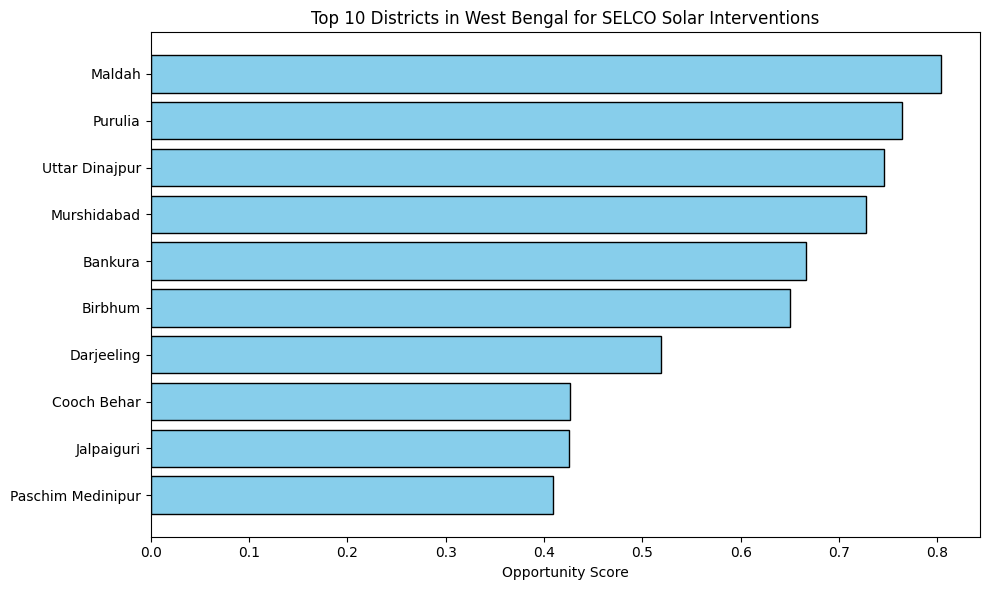

In [2]:
# Bar Chart: Top 10 Districts
top10 = df_sorted.head(10)
plt.figure(figsize=(10, 6))
plt.barh(top10["District"], top10["Opportunity Score"], color="skyblue", edgecolor="black")
plt.xlabel("Opportunity Score")
plt.title("Top 10 Districts in West Bengal for SELCO Solar Interventions")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()